In [17]:
!pip install pynrrd


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nrrd

In [19]:
import matplotlib.pyplot as plt
import numpy as np

(256, 256, 112)


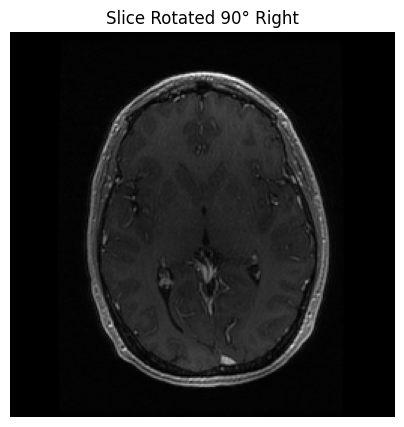

In [20]:
data1, header1 = nrrd.read('files/MRBrainTumor1.nrrd')
# Check the data and header
print(data1.shape)

slice_index = 50  # Select the index of the slice you want to visualize
rotated_slice = np.rot90(data1[:, :, slice_index], k=3)

plt.figure(figsize=(5, 5))
plt.imshow(rotated_slice, cmap='gray')
plt.title(f'Slice Rotated 90° Right')
plt.axis('off')  # This removes the axis ticks and labels
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from ipywidgets import interact

In [22]:
# Rotate the first data set to align it vertically
data2, header2 = nrrd.read('files/MRHead_1.nrrd')
data2_rotated = np.rot90(data2, axes=(1, 0))

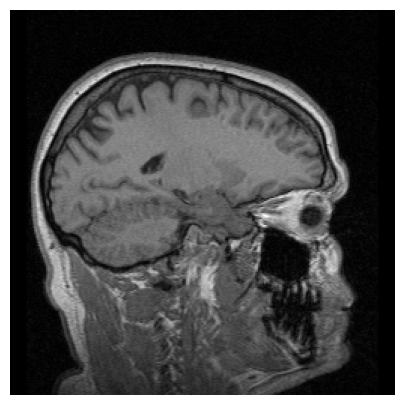

In [23]:
# data2_rotated = rotate(data2, 225, axes=(0, 1), reshape=True, mode='nearest')
plt.figure(figsize=(5, 5))
plt.imshow(data2_rotated[:, :, 50], cmap='gray')
plt.axis('off')  # This removes the axis ticks and labels
plt.show()

In [24]:
# This function creates the equation of a plane given three points.
def create_plane_equation(point1, point2, point3):
    v1 = point2 - point1 # Creates a vector from point1 to point2.
    v2 = point3 - point1 # Creates a vector from point1 to point3.
    normal = np.cross(v1, v2) # Calculates the normal vector to the plane using the cross product.
    d = -np.dot(normal, point1) # Calculates the constant term in the plane equation.
    # Returns the plane equation as [A, B, C, D] where Ax + By + Cz + D = 0.
    return np.append(normal, d)

In [25]:
# This function extracts points near the defined plane from the 3D data.
def extract_plane(data, plane_eq, tolerance=0.01):
    x, y, z = np.meshgrid(range(data.shape[0]), range(data.shape[1]), range(data.shape[2]), indexing='ij') # create a 3D grid of coordinates that correspond to the indices of the data array in each dimension.
    plane = plane_eq[0]*x + plane_eq[1]*y + plane_eq[2]*z + plane_eq[3] # Computes the plane equation for every point in the 3D space.
    mask = np.abs(plane) < tolerance # Creates a mask for points close to the plane.
    # Transposes the resulting coordinate array to have a shape (n_points, 3), where n_points is the number of points near the plane. Each row represents the (x, y, z) coordinate of a point.
    coords = np.array(np.where(mask)).T
    values = data[mask] #   Retrieves the values from data where the mask is True.
    # Returns the coordinates and values of points near the plane.
    return coords, values

In [26]:
# This function interpolates the extracted plane points onto a regular grid.
# Takes scattered points near a plane extracted from a 3D dataset and interpolates them onto a regular 2D grid
def interpolate_plane(coords, values, resolution=256):
    min_coords = np.min(coords, axis=0)
    max_coords = np.max(coords, axis=0)
    grid_x, grid_y = np.meshgrid(np.linspace(min_coords[0], max_coords[0], resolution),
                                 np.linspace(min_coords[1], max_coords[1], resolution)) # Creates a linearly spaced array with resolution points between the minimum and maximum x/y-coordinates. This forms the grid's x/y-axis.
    grid_z = griddata(coords[:, :2], values, (grid_x, grid_y), method='linear') #  Interpolates the values onto the regular grid.
    return grid_z # Returns the interpolated grid.
    # producing a smooth surface representation of data values projected onto the plane.

In [27]:
# This function plots the extracted and interpolated plane.
def plot_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z):
    p1 = np.array([p1x, p1y, p1z])
    p2 = np.array([p2x, p2y, p2z])
    p3 = np.array([p3x, p3y, p3z])
    
    plane_eq = create_plane_equation(p1, p2, p3)
    coords, values = extract_plane(data2_rotated, plane_eq) #  to get points near the plane.
    
    if len(coords) == 0:
        print("No points found on the plane.")
        return
    
    grid_z = interpolate_plane(coords, values) #to create a regular grid of values. 
    # Uses matplotlib to plot the interpolated plane.
    
    plt.figure(figsize=(5, 5))
    plt.imshow(grid_z, cmap='gray', aspect='equal')
    plt.title('Slice from Plane')
    plt.colorbar(label='Intensity')
    plt.show()
    
# Interactive widget to plot a plane
interact(plot_plane, 
         p1x=(100), p1y=(100), p1z=(40),
         p2x=(150), p2y=(250), p2z=(20),
         p3x=(0), p3y=(200), p3z=(50))




interactive(children=(IntSlider(value=100, description='p1x', max=300, min=-100), IntSlider(value=100, descrip…

<function __main__.plot_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z)>

In [28]:
!pip install pyvista --upgrade



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:

import pyvista as pv

In [30]:
# This function plots the extracted and interpolated plane.
def plot_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z):
    p1 = np.array([p1x, p1y, p1z])
    p2 = np.array([p2x, p2y, p2z])
    p3 = np.array([p3x, p3y, p3z])
    
    plane_eq = create_plane_equation(p1, p2, p3)
    coords, values = extract_plane(data1, plane_eq) #  to get points near the plane.
    
    if len(coords) == 0:
        print("No points found on the plane.")
        return
    
    grid_z = interpolate_plane(coords, values) #to create a regular grid of values. 
    # Uses matplotlib to plot the interpolated plane.
    
    plt.figure(figsize=(5, 5))
    plt.imshow(grid_z, cmap='gray', aspect='equal')
    plt.title('Slice from Plane')
    plt.colorbar(label='Intensity')
    plt.show()
    

# Interactive widget to plot a plane
interact(plot_plane, 
         p1x=(100), p1y=(100), p1z=(40),
         p2x=(150), p2y=(250), p2z=(20),
         p3x=(0), p3y=(200), p3z=(50))

# Function to visualize the plane on a 3D volume
def visualize_with_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z):
    p1 = np.array([p1x, p1y, p1z])
    p2 = np.array([p2x, p2y, p2z])
    p3 = np.array([p3x, p3y, p3z])

    plane_eq = create_plane_equation(p1, p2, p3)
    coords, values = extract_plane(data1, plane_eq)
    
    if len(coords) == 0:
        print("No points found on the plane.")
        return
    
    x_range = [0, data1.shape[0] - 1]
    y_range = [0, data1.shape[1] - 1]
    z_range = [0, data1.shape[2] - 1]

    grid_plane = pv.Plane(center=(np.mean(x_range), np.mean(y_range), np.mean(z_range)),
                         i_size=np.ptp(x_range), j_size=np.ptp(y_range),
                         direction=plane_eq[:3], j_resolution=100, i_resolution=100)

    # Visualize the 3D dataset
    grid = pv.wrap(data1)
    grid.point_data['values'] = data1.flatten(order='F')

    plotter = pv.Plotter()
    plotter.add_volume(grid, cmap="bone", opacity='sigmoid')
    plotter.add_mesh(grid_plane, color='red', opacity=0.5)  # Add the plane in red for visibility
    plotter.show_grid()
    plotter.camera_position = (-100, -200, 0)
    plotter.show(jupyter_backend='pythreejs')
    
# Interactive widget to plot a plane
interact(visualize_with_plane,
         p1x=(100), p1y=(100), p1z=(40),p2x=(150), p2y=(250), p2z=(20),p3x=(0), p3y=(200), p3z=(50))
    


interactive(children=(IntSlider(value=100, description='p1x', max=300, min=-100), IntSlider(value=100, descrip…

interactive(children=(IntSlider(value=100, description='p1x', max=300, min=-100), IntSlider(value=100, descrip…

<function __main__.visualize_with_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z)>

In [31]:
# This function plots the extracted and interpolated plane.
def plot_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z):
    p1 = np.array([p1x, p1y, p1z])
    p2 = np.array([p2x, p2y, p2z])
    p3 = np.array([p3x, p3y, p3z])
    
    plane_eq = create_plane_equation(p1, p2, p3)
    coords, values = extract_plane(data2_rotated, plane_eq) #  to get points near the plane.
    
    if len(coords) == 0:
        print("No points found on the plane.")
        return
    
    grid_z = interpolate_plane(coords, values) #to create a regular grid of values. 
    # Uses matplotlib to plot the interpolated plane.
    
    plt.figure(figsize=(5, 5))
    plt.imshow(grid_z, cmap='gray', aspect='equal')
    plt.title('Slice from Plane')
    plt.colorbar(label='Intensity')
    plt.show()
    

# Interactive widget to plot a plane
interact(plot_plane, 
         p1x=(100), p1y=(100), p1z=(40),
         p2x=(150), p2y=(250), p2z=(20),
         p3x=(0), p3y=(200), p3z=(50))

# Function to visualize the plane on a 3D volume
def visualize_with_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z):
    p1 = np.array([p1x, p1y, p1z])
    p2 = np.array([p2x, p2y, p2z])
    p3 = np.array([p3x, p3y, p3z])

    plane_eq = create_plane_equation(p1, p2, p3)
    coords, values = extract_plane(data2_rotated, plane_eq)
    
    if len(coords) == 0:
        print("No points found on the plane.")
        return
    
    x_range = [0, data2_rotated.shape[0] - 1]
    y_range = [0, data2_rotated.shape[1] - 1]
    z_range = [0, data2_rotated.shape[2] - 1]

    grid_plane = pv.Plane(center=(np.mean(x_range), np.mean(y_range), np.mean(z_range)),
                         i_size=np.ptp(x_range), j_size=np.ptp(y_range),
                         direction=plane_eq[:3], j_resolution=100, i_resolution=100)
    

    # Visualize the 3D dataset
    grid = pv.wrap(data2_rotated)
    grid.point_data['values'] = data2_rotated.flatten(order='F')

    plotter = pv.Plotter()
    plotter.add_volume(grid, cmap="bone", opacity='sigmoid')
    plotter.add_mesh(grid_plane, color='red', opacity=0.5)  # Add the plane in red for visibility
    plotter.show_grid()
    plotter.camera_position = (-100, -200, 0)
    plotter.show(jupyter_backend='pythreejs')
    
# Interactive widget to plot a plane
interact(visualize_with_plane,
         p1x=(100), p1y=(100), p1z=(40),p2x=(150), p2y=(250), p2z=(20),p3x=(0), p3y=(200), p3z=(50))
    

interactive(children=(IntSlider(value=100, description='p1x', max=300, min=-100), IntSlider(value=100, descrip…

interactive(children=(IntSlider(value=100, description='p1x', max=300, min=-100), IntSlider(value=100, descrip…

<function __main__.visualize_with_plane(p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z)>